In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("cleanp2.csv")

In [3]:
titanic.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

In [4]:
### gives info about each column
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   int64  
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1300 non-null   float64
 6   sibsp       1308 non-null   float64
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1309 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   1309 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 153.5+ KB


In [5]:
## picking cols we want to visualize
cols = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch','embarked','home.dest','fare']
t2 = titanic[cols]

In [6]:
t2

,pclass,survived,name,sex,age,sibsp,parch,embarked,home.dest,fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0,S,USA,2113.375
1,1,1,"Allison, Master. Hudson Trevor",male,92.0,1.0,2,S,CANADA,151.000
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2,S,CANADA,151.000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2,S,CANADA,151.000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2,S,CANADA,151.000
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,16.0,1.0,0,C,UK,144.000
1305,3,0,"Zabour, Miss. Thamine",female,19.0,1.0,0,C,UK,144.000
1306,3,0,"Zakarian, Mr. Mapriededer",male,22.0,0.0,0,C,TURKEY,7.000
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0.0,0,C,TURKEY,7.000


## Basic scatter plot

In [7]:
x= list(range(10,20,3))
y = list(range(20,30,3))

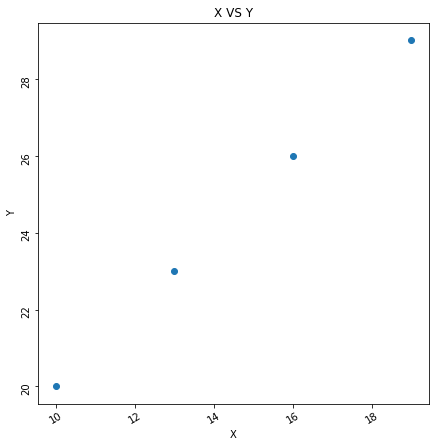

In [8]:
# scatter plot
plt.figure(figsize =(7,7))
plt.scatter(x,y)
plt.title("X VS Y",loc="center")
plt.ylabel("Y")
plt.xlabel("X")
plt.xticks(rotation = 30.5)
plt.yticks(rotation = 90)
plt.show()

## plotting the scatter plot on our data


In [9]:
### cleaning (rough cleaning)
med = t2["fare"].median()
mean_a = t2["age"].mean()
t2['fare'].fillna(med,inplace=True)
t2["age"].fillna(mean_a,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
t2.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,2.294882,0.381971,30.093077,0.499235,0.385027,146.400974
std,0.837836,0.486055,14.239480,1.041965,0.865560,407.393240
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,11.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,29.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,86.000000
max,3.000000,1.000000,92.000000,8.000000,9.000000,5123.292000


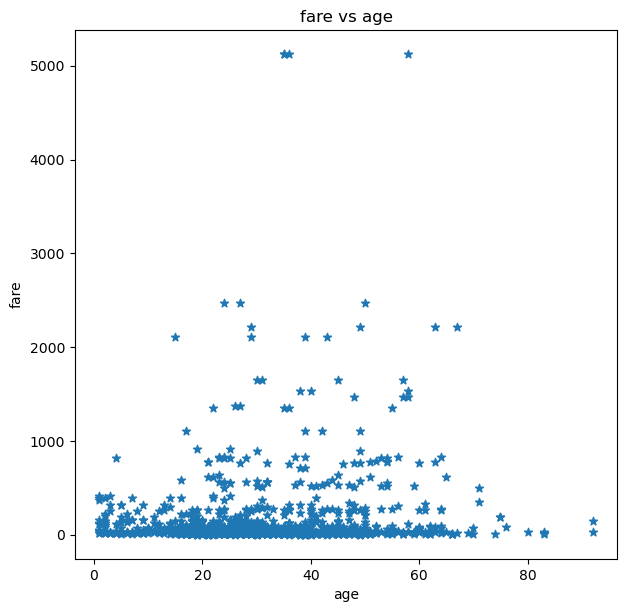

In [11]:
### fare and age relationship

plt.figure(figsize=(7,7),dpi = 100)
plt.scatter(t2["age"],t2["fare"],marker="*")
plt.ylabel("fare")
plt.xlabel("age")
plt.title("fare vs age")
plt.show()

In [12]:
#### new DF with regions and count of regions
destination =pd.DataFrame(t2["home.dest"].value_counts()).reset_index()

In [13]:
### reset index
destination.rename(columns ={"index":"d/o","home.dest":"n_p"},inplace=True)

In [14]:
## making capilized values small
destination["d/o2"]= [i.lower() for i in destination["d/o"]]

In [15]:
### making capilized values small
locations = []
for name in destination["d/o"]:
    locations.append(name.lower())
destination["d/o3"]=locations

In [16]:
destination.head()

,d/o,n_p,d/o2,d/o3
0,UK,329,uk,uk
1,USA,319,usa,usa
2,IRELAND,117,ireland,ireland
3,SWEDEN,103,sweden,sweden
4,FINLAND,54,finland,finland


## Bar chart plotting

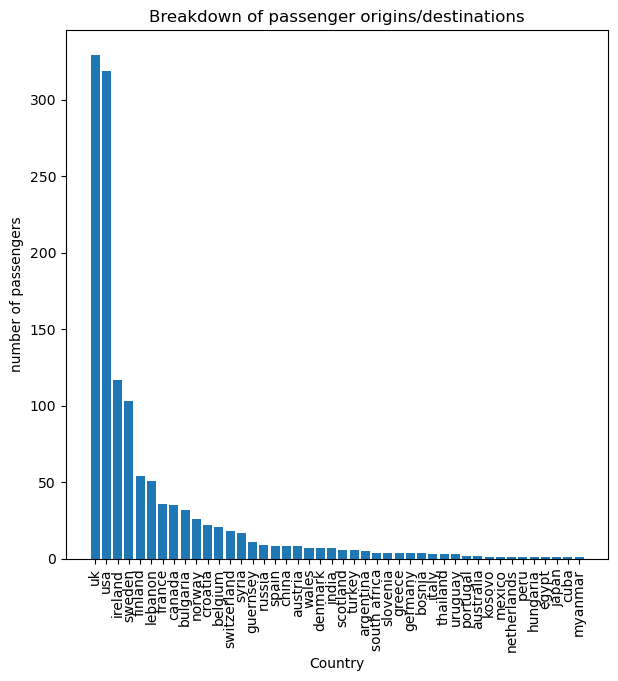

In [17]:
## regions and n of pple from diff regions
plt.figure(figsize=(7,7),dpi = 100)
plt.bar(destination["d/o2"],destination["n_p"])
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("number of passengers")
plt.title("Breakdown of passenger origins/destinations")
plt.show()

In [18]:
###sorting the values for the barh graph
destination.sort_values("n_p",ascending = False,inplace=True)

In [19]:
### sample font dictionary
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


## Bar H plotting

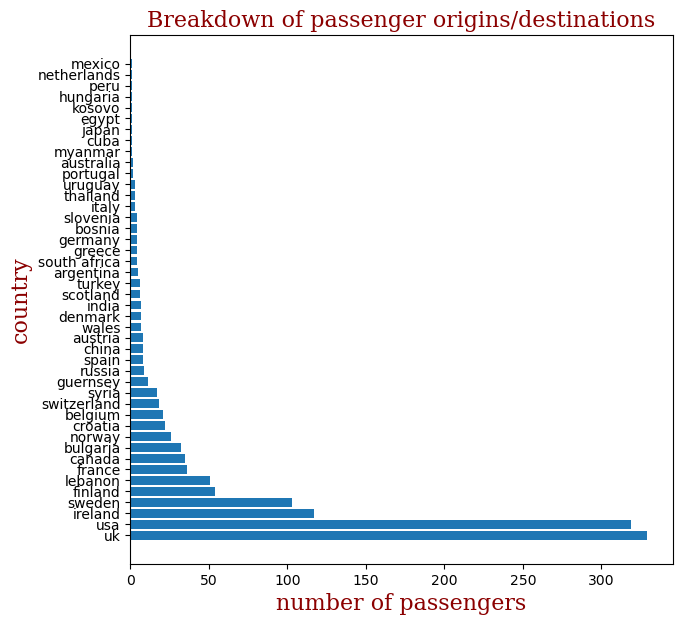

In [20]:
plt.figure(figsize=(7,7),dpi = 100)
plt.barh(destination["d/o2"],destination["n_p"],height=0.8)
plt.xticks()
plt.xlabel("number of passengers",font)
plt.ylabel("country",font)
plt.title("Breakdown of passenger origins/destinations",font)
plt.yticks()
plt.show()

In [21]:
t2[t2["survived"]==1].shape[0]

500

In [22]:
dead = t2[t2["survived"]==0].shape[0]

In [23]:
dead

809

In [24]:
### separating titles from the name column
titles = []
for i in t2.name:
    name = i.split()
    name_l = []
    for j in name:
        if j[-1]==".":
            name_l.append(j)
    if len(name_l)>1:
        print(name_l)
    titles.append(name_l[0])
t2["titles"]=titles           

['Mrs.', 'L.']


<ipython-input-24-7fbbf0b12ac3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2["titles"]=titles


In [25]:
## visual showing class distribution based on title
titles_df = pd.DataFrame(t2.titles.value_counts())

In [26]:
### reset the index
titles_df.reset_index(inplace=True)

In [27]:
### renaming the data frame cols
titles_df.rename(columns = {"index":"titles","titles":"n_of_p"},
                 inplace=True)

In [28]:
titles_df

,titles,n_of_p
0,Mr.,757
1,Miss.,260
2,Mrs.,197
3,Master.,61
4,Dr.,8
5,Rev.,8
6,Col.,4
7,Major.,2
8,Mlle.,2
9,Ms.,2


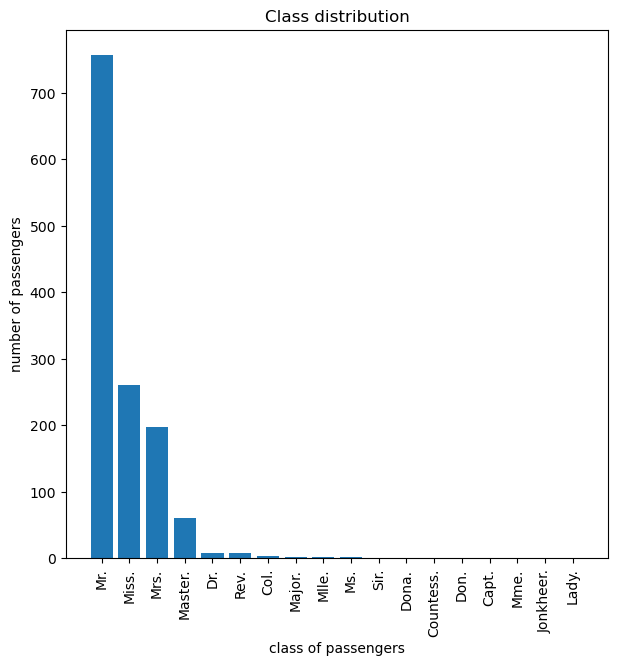

In [29]:
### bargraph for the above
plt.figure(figsize=(7,7),dpi =100)
plt.bar(titles_df.titles,titles_df["n_of_p"])
plt.xticks(rotation=90)
plt.title("Class distribution")
plt.ylabel("number of passengers")
plt.xlabel("class of passengers")
plt.show()

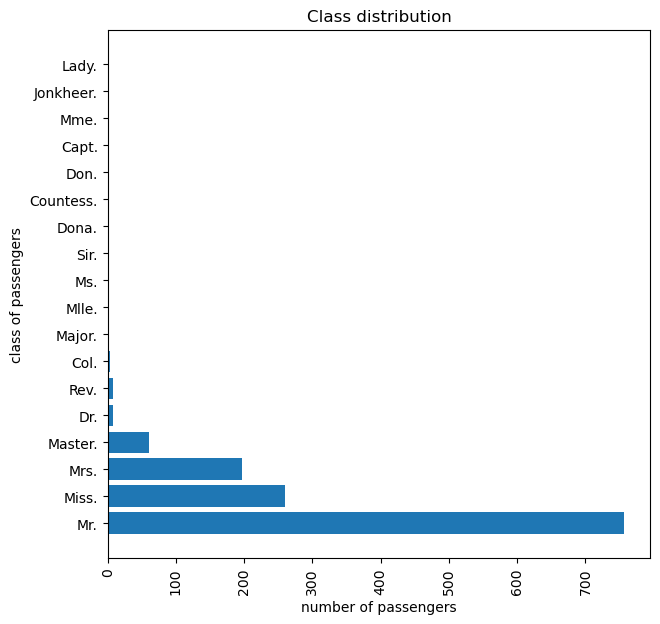

In [30]:
plt.figure(figsize=(7,7),dpi =100)
plt.barh(titles_df.titles,titles_df["n_of_p"])
plt.xticks(rotation=90)
plt.title("Class distribution")
plt.xlabel("number of passengers")
plt.ylabel("class of passengers")
plt.show()

## pie chart plotting

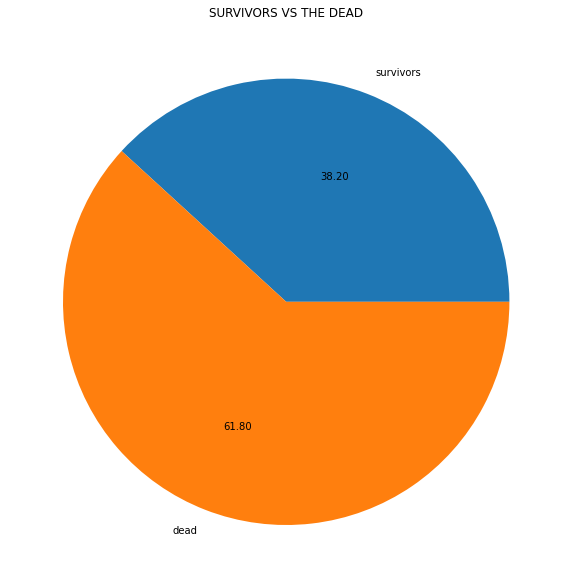

In [31]:
## piechart in python showing survivors vs dead
survive = t2[t2["survived"]==1].shape[0]
dead = t2[t2["survived"]==0].shape[0]
plt.figure(figsize = (10,15))
plt.pie([survive,dead],labels = ['survivors','dead'],
        autopct="%.2f")
plt.title("SURVIVORS VS THE DEAD")
plt.show()

In [32]:
unique_titles = list(titles_df.titles.unique())

In [33]:
### further categorizing the observations
commoners = ['Mr.',
 'Miss.',
 'Mrs.','Don.','Mlle.','Ms.','Dona.','Mme.','Master.']

nobility = ['Jonkheer.',
 'Countess.','Lady.']

army_navy = ['Major.','Capt.',
 'Sir.','Col.']
religion_medicine = ['Rev.',
 'Dr.']

In [34]:
len(commoners)+len(nobility)+len(army_navy)+len(religion_medicine)

18

In [35]:
### creating encoder for categorizing titles
encoder = []
for title in titles_df.titles:
    if title in commoners:
        encoder.append("common")
    elif title in nobility:
        encoder.append("royalty")
    elif title in army_navy:
        encoder.append("military")
    else:
        encoder.append("religion_medicine")

In [36]:
### adding the new category column
titles_df["categories"]=encoder

In [37]:
titles_df.head()

,titles,n_of_p,categories
0,Mr.,757,common
1,Miss.,260,common
2,Mrs.,197,common
3,Master.,61,common
4,Dr.,8,religion_medicine


In [38]:
### using group by to get grouped data based on categories column
final_df = titles_df.groupby(["categories"]).sum()

In [39]:
final_df

,n_of_p
categories,
common,1282
military,8
religion_medicine,16
royalty,3


In [40]:
## creating labels for piechart 
labels = list(final_df.index)

In [41]:
labels

['common', 'military', 'religion_medicine', 'royalty']

In [42]:
#### defining explode values (to see varied explosions use separator list under explode arg)
import random
separator = []
for i in range(len(labels)):
    separator.append(random.random())


In [43]:
separator

[0.573607373780376, 0.7456742960920353, 0.2664196792268727, 0.8443198570681665]

In [44]:
### list of number of passengers meeting the diff class grps
pax = list(final_df['n_of_p'].unique())

In [45]:
pax

[1282, 8, 16, 3]

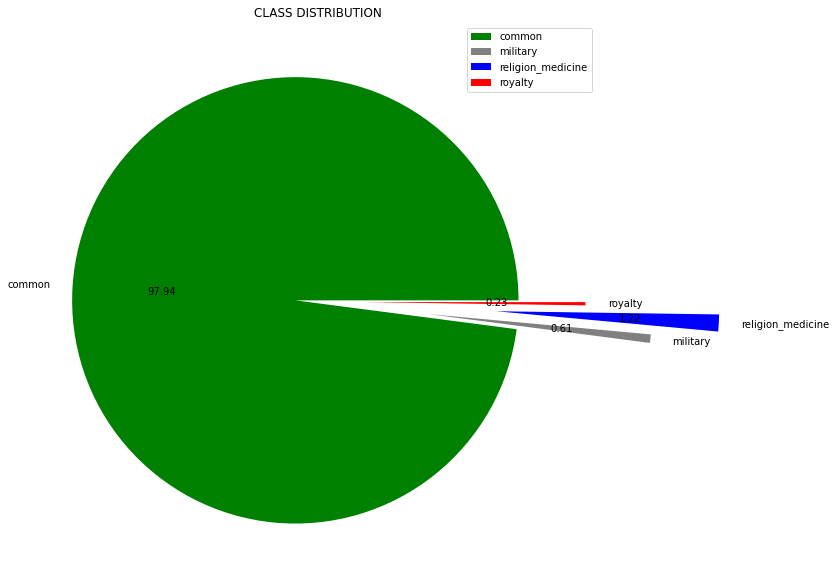

In [46]:
### piechart showing dist of pple wrt the 4 classes (labeled pie chart)
plt.figure(figsize = (10,15))
plt.pie(pax,labels = labels,autopct="%.2f",explode = [0.1,0.5,0.8,0.2],
       colors=["green","grey","blue","red"])
plt.legend()
plt.title("CLASS DISTRIBUTION")
plt.show()



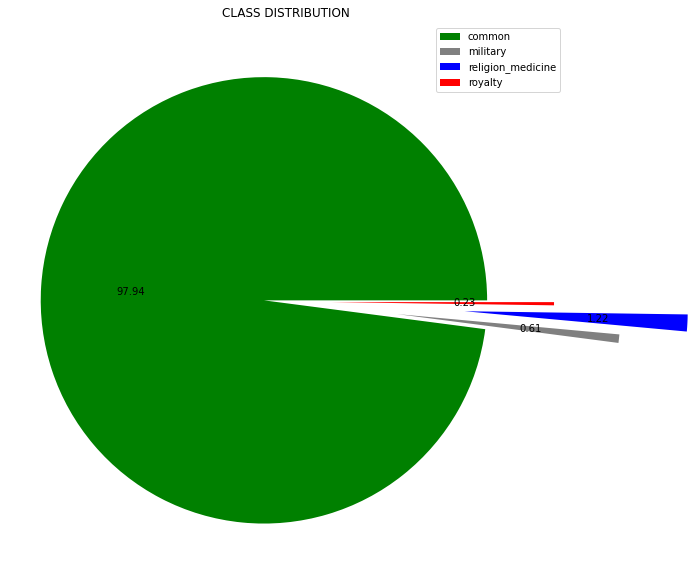

In [47]:
### piechart showing dist of pple wrt the 4 classes (labeled pie chart)
### removing the labels on the pie chart
plt.figure(figsize = (10,15))
plt.pie(pax,autopct="%.2f",explode = [0.1,0.5,0.8,0.2],
       colors=["green","grey","blue","red"])
plt.legend(labels)
plt.title("CLASS DISTRIBUTION")
plt.show()


## boxplot

In [48]:
## fare payment based on age (checks for the deviation in fare paid within same age groups)
kids = t2[t2['age']<=18]['fare']
youth = t2[(t2['age']>18)&(t2['age']<=35)]['fare']
mid_aged = t2[(t2['age']>35)&(t2['age']<=60 )]['fare']
old = t2[t2['age']>60]['fare']

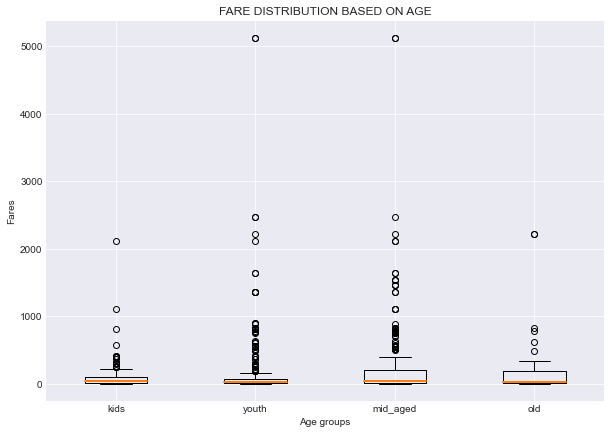

In [49]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,7))
plt.boxplot([kids,youth,mid_aged,old],
            labels = ['kids','youth','mid_aged',
                      'old'],
            medianprops={'linewidth': 2})
plt.title("FARE DISTRIBUTION BASED ON AGE")
plt.xlabel("Age groups")
plt.ylabel("Fares")
plt.show()

In [50]:
## boxplot showing variations in age with respect to the 4 age groups
kids2 = t2[t2['age']<=18]['age']
youth2 = t2[(t2['age']>18)&(t2['age']<=35)]['age']
mid_aged2 = t2[(t2['age']>35)&(t2['age']<=60 )]['age']
old2 = t2[t2['age']>60]['age']

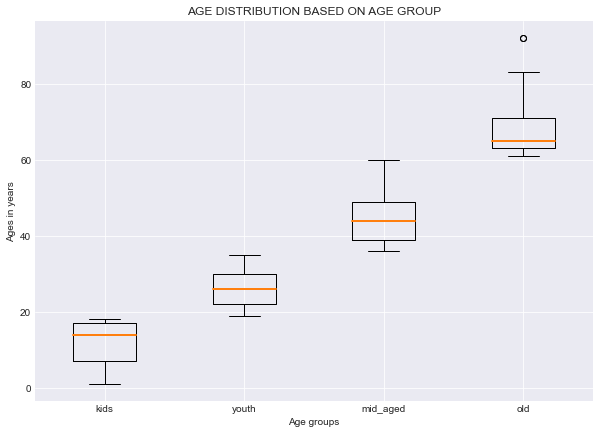

In [51]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,7))
plt.boxplot([kids2,youth2,mid_aged2,old2],
            labels = ['kids','youth','mid_aged','old'],
            medianprops={'linewidth': 2})
plt.title("AGE DISTRIBUTION BASED ON AGE GROUP")
plt.xlabel("Age groups")
plt.ylabel("Ages in years")
plt.show()

## Histogram

In [52]:
### Showing distribution in the age

In [53]:
groups = [0,40,60,80,100]

<function matplotlib.pyplot.show(close=None, block=None)>

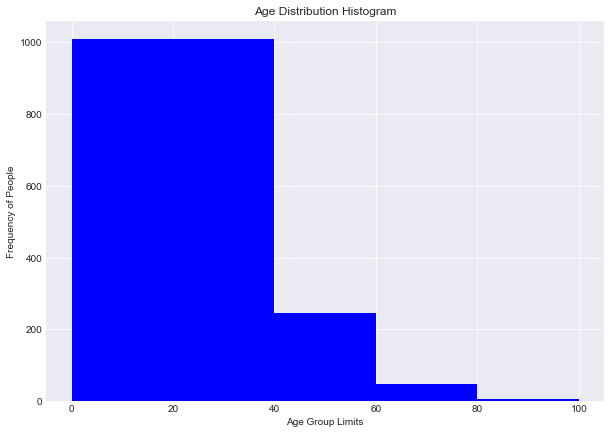

In [54]:
plt.figure(figsize=(10,7))
plt.hist(t2['age'],bins= groups,color='blue')
plt.title("Age Distribution Histogram")
plt.xlabel('Age Group Limits')
plt.ylabel('Frequency of People')
plt.show

### Line Graph

In [55]:
### Distribution of Fares in Data-set

In [56]:
x1 = list(range(10,30))
y1 = list(range(30,50))

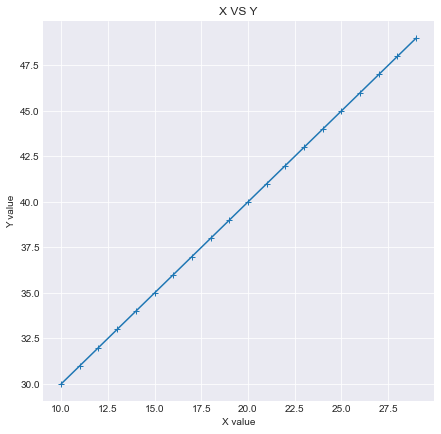

In [57]:
plt.figure(figsize=(7,7))
plt.plot(x1,y1,marker="+")
plt.ylabel("Y value")
plt.xlabel("X value")
plt.title("X VS Y")
plt.show()

In [58]:
gas = pd.read_csv("gas_prices.csv")

In [59]:
gas

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


In [60]:
gas_df = pd.DataFrame(gas)

In [61]:
gas_df

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


In [62]:
gas_df.isnull().sum()

Year           0
Australia      1
Canada         0
France         0
Germany        0
Italy          0
Japan          0
Mexico         0
South Korea    0
UK             0
USA            0
dtype: int64

In [63]:
mean_a = gas_df.Australia.mean()
gas_df["Australia"].fillna(mean_a,inplace=True)

In [64]:
gas_df.isnull().sum()

Year           0
Australia      0
Canada         0
France         0
Germany        0
Italy          0
Japan          0
Mexico         0
South Korea    0
UK             0
USA            0
dtype: int64

In [65]:
gas_df

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,2.348889,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.960000,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.890000,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.730000,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.840000,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.950000,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.120000,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.050000,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.630000,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.720000,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


In [66]:
gas_df.columns

Index(['Year', 'Australia', 'Canada', 'France', 'Germany', 'Italy', 'Japan',
       'Mexico', 'South Korea', 'UK', 'USA'],
      dtype='object')

In [67]:
n_d = gas_df[['Year', 'Australia', 'Canada', 'France']]
n_d.head()

,Year,Australia,Canada,France
0,1990,2.348889,1.87,3.63
1,1991,1.960000,1.92,3.45
2,1992,1.890000,1.73,3.56
3,1993,1.730000,1.57,3.41
4,1994,1.840000,1.45,3.59


In [68]:
gaslabel = gas_df[['Australia', 'Canada', 'France',]]

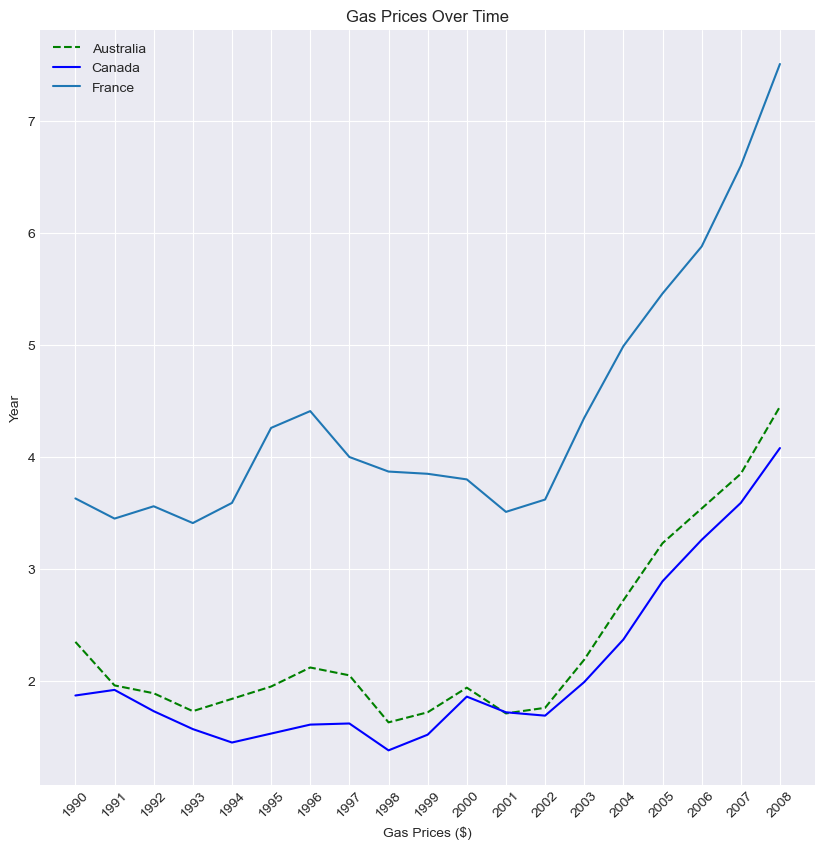

In [69]:
plt.figure(figsize=(10,10),dpi=100)
plt.plot(n_d['Year'],n_d['Australia'],"g--")
plt.plot(n_d['Year'],n_d['Canada'],"b")
plt.plot(n_d['Year'],n_d['France'])
plt.xlabel("Gas Prices ($)")
plt.ylabel("Year")
plt.title("Gas Prices Over Time")
plt.xticks(n_d["Year"],rotation=45)
plt.legend(gaslabel)
plt.show()

In [70]:
n_d.columns

Index(['Year', 'Australia', 'Canada', 'France'], dtype='object')

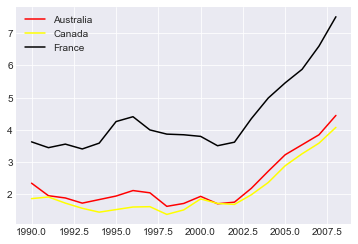

In [71]:
color = ['blue','red','yellow','black']
for col,color in zip(n_d.columns,color):
    if col != "Year":
        plt.plot(n_d['Year'],n_d[col],label=col,color=color)
plt.legend()
plt.show()

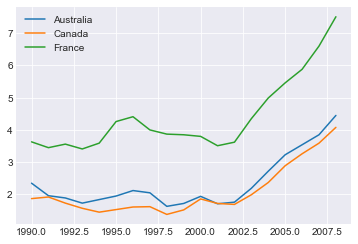

In [72]:
for col in n_d.columns:
    if col != "Year":
        plt.plot(n_d['Year'],n_d[col],label=col,)
plt.legend()
plt.show()

In [73]:
gas_df.columns

Index(['Year', 'Australia', 'Canada', 'France', 'Germany', 'Italy', 'Japan',
       'Mexico', 'South Korea', 'UK', 'USA'],
      dtype='object')

In [74]:
col_needed = ['Australia', 'South Korea', 'UK', 'USA']

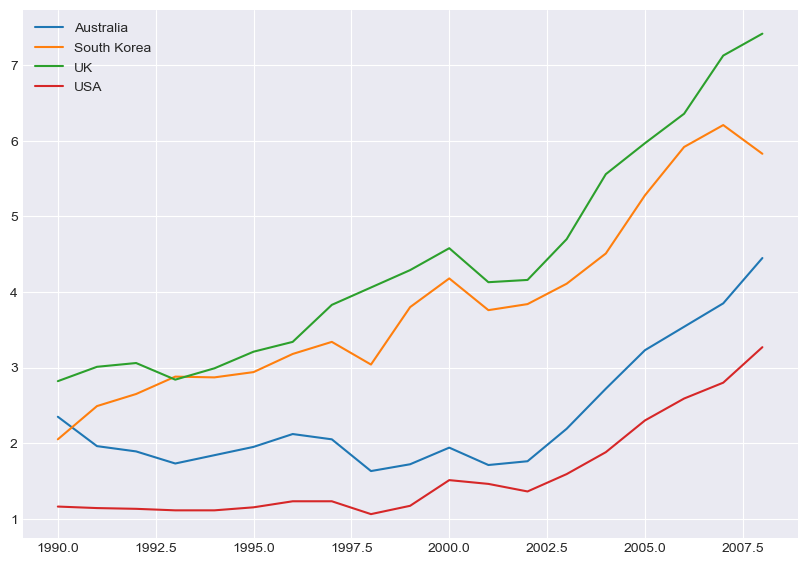

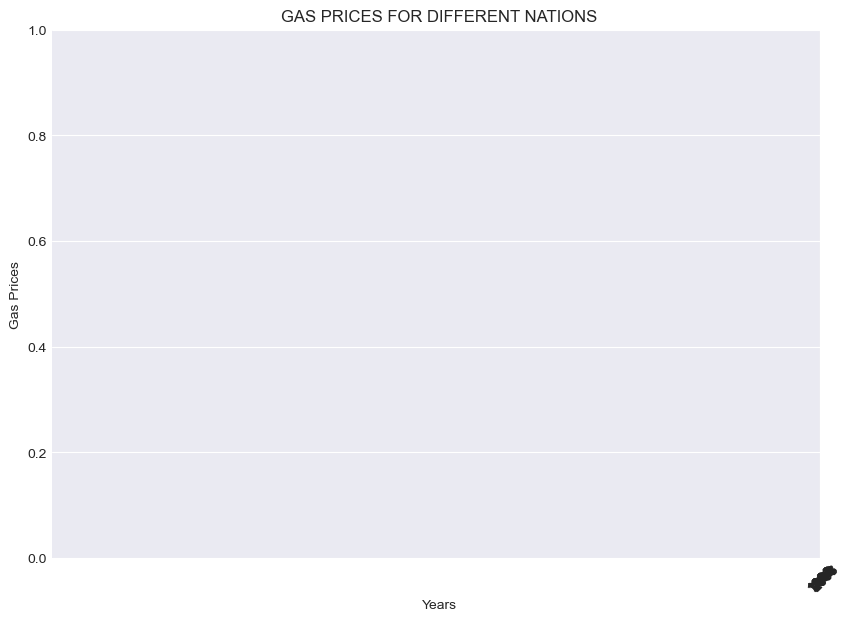

In [75]:
plt.figure(figsize=(10,7),dpi=100)

for col in gas_df.columns:
    
    if col !="Year":
        if col in col_needed:
            plt.plot(gas_df['Year'],gas_df[col],label=col)
plt.legend()
plt.figure(figsize=(10,7),dpi=100)
plt.xticks(gas_df.Year,rotation=45)
plt.xlabel("Years")
plt.ylabel("Gas Prices")
plt.title("GAS PRICES FOR DIFFERENT NATIONS")
plt.show()